In [327]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from matplotlib import font_manager, rc
import math
import scipy as sp

sns.set_palette("Set2")

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

서울시 기초 데이터 살펴보기

In [328]:
seouldong = pd.read_csv('seouldong.csv')

In [329]:
seouldong.head()

,기준일ID,시간대구분,행정동코드,총생활인구수
0,20201127,0,서강동,28944.5254
1,20201127,0,성내제2동,27686.7229
2,20201127,0,회현동,8786.8275
3,20201127,0,신수동,21312.4672
4,20201127,0,전농제2동,18067.8559


In [330]:
seouldong.tail()

,기준일ID,시간대구분,행정동코드,총생활인구수
10171,20201127,23,상계6.7동,38351.3077
10172,20201127,23,삼전동,35514.7087
10173,20201127,23,삼성동,25850.0262
10174,20201127,23,삼성1동,20036.6370
10175,20201127,23,대흥동,18626.1671


In [331]:
seouldong.describe()

,기준일ID,시간대구분,총생활인구수
count,10176.0,10176.000000,10176.000000
mean,20201127.0,11.500000,24769.703363
std,0.0,6.922527,13312.704401
min,20201127.0,0.000000,3948.683900
25%,20201127.0,5.750000,16270.609450
50%,20201127.0,11.500000,22156.546900
75%,20201127.0,17.250000,30346.259550
max,20201127.0,23.000000,159153.811300


In [332]:
seouldong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10176 entries, 0 to 10175
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준일ID   10176 non-null  int64  
 1   시간대구분   10176 non-null  int64  
 2   행정동코드   10176 non-null  object 
 3   총생활인구수  10176 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 318.1+ KB


In [333]:
seouldong.columns

Index(['기준일ID', '시간대구분', '행정동코드', '총생활인구수'], dtype='object')

서울시 기초 데이터 전처리

In [334]:
seouldong.head()

,기준일ID,시간대구분,행정동코드,총생활인구수
0,20201127,0,서강동,28944.5254
1,20201127,0,성내제2동,27686.7229
2,20201127,0,회현동,8786.8275
3,20201127,0,신수동,21312.4672
4,20201127,0,전농제2동,18067.8559


In [335]:
seouldong.drop("기준일ID",axis=1,inplace=True)

In [336]:
seouldong

,시간대구분,행정동코드,총생활인구수
0,0,서강동,28944.5254
1,0,성내제2동,27686.7229
2,0,회현동,8786.8275
3,0,신수동,21312.4672
4,0,전농제2동,18067.8559
...,...,...,...
10171,23,상계6.7동,38351.3077
10172,23,삼전동,35514.7087
10173,23,삼성동,25850.0262
10174,23,삼성1동,20036.6370


In [337]:
seouldong.rename(columns = {"행정동코드": "행정동"}, inplace = True)

In [338]:
seouldong.head()

,시간대구분,행정동,총생활인구수
0,0,서강동,28944.5254
1,0,성내제2동,27686.7229
2,0,회현동,8786.8275
3,0,신수동,21312.4672
4,0,전농제2동,18067.8559


In [339]:
seouldong.isna().sum()

시간대구분     0
행정동       0
총생활인구수    0
dtype: int64

In [340]:
seouldong.describe()

,시간대구분,총생활인구수
count,10176.000000,10176.000000
mean,11.500000,24769.703363
std,6.922527,13312.704401
min,0.000000,3948.683900
25%,5.750000,16270.609450
50%,11.500000,22156.546900
75%,17.250000,30346.259550
max,23.000000,159153.811300


서울시 기초 데이터 분석

In [343]:
grouped = seouldong.groupby(['행정동','시간대구분'])

In [344]:
gg=grouped.mean()
#gg

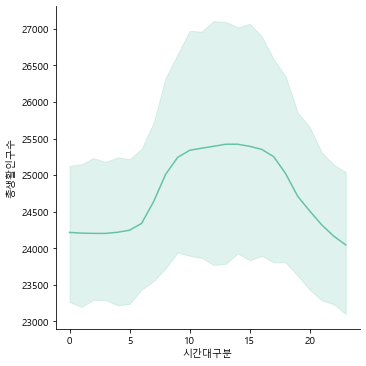

In [345]:
sns.relplot(data=gg,x='시간대구분',y='총생활인구수',kind='line')

In [346]:
seoul_time = seouldong.pivot_table(values='총생활인구수',index='행정동',columns='시간대구분')
#seoul_time

In [347]:
a = np.max(seoul_time,axis = 1) - np.min(seoul_time,axis=1)
#a

In [348]:
b = np.max(seoul_time,axis=1)*0.2
#b

In [349]:
fal = a < b

In [350]:
etc = seoul_time[fal == True]  #기타지역

In [351]:
pd.set_option('display.max_seq_items',None)

In [352]:
etc.index

Index(['가락1동', '가락2동', '가락본동', '가리봉동', '가양제2동', '가양제3동', '갈현제1동', '강일동',
       '개봉제1동', '개포2동', '개포4동', '거여1동', '고덕제2동', '고척제1동', '공덕동', '공릉1동',
       '공릉2동', '공항동', '광장동', '교남동', '구로제5동', '구의제3동', '군자동', '금호4가동', '길동',
       '낙성대동', '남가좌제1동', '남가좌제2동', '노량진제1동', '노량진제2동', '다산동', '답십리제1동',
       '답십리제2동', '당산제2동', '대림제1동', '대림제3동', '대방동', '도곡2동', '도봉제1동', '도봉제2동',
       '도화동', '독산제1동', '동선동', '동화동', '둔촌제2동', '등촌제1동', '마장동', '마천2동', '망우본동',
       '망원제2동', '면목제5동', '명일제1동', '목5동', '문정1동', '미아동', '반포1동', '반포2동',
       '발산제1동', '방배4동', '방배본동', '방이2동', '방학제1동', '방화제1동', '방화제2동', '번1동',
       '부암동', '사당제2동', '삼선동', '상계10동', '상계1동', '상계2동', '상계5동', '상계6.7동',
       '상도제2동', '상봉제1동', '상봉제2동', '상일동', '서강동', '서빙고동', '석관동', '석촌동', '성내제1동',
       '성내제2동', '성내제3동', '성북동', '성산제1동', '성산제2동', '세곡동', '송중동', '송천동', '송파1동',
       '송파2동', '수색동', '수유3동', '숭인제1동', '시흥제1동', '시흥제3동', '신길제1동', '신길제5동',
       '신내2동', '신당제5동', '신대방제2동', '신도림동', '신월3동', '신월5동', '신정1동', '신정2동',
       '신정4동', '신정7동', '쌍

In [353]:
fal_region = seoul_time[fal == False]

In [354]:
fal_region2 = fal_region.idxmax(axis=1)

In [355]:
work = fal_region2[(fal_region2 >= 8) & (fal_region2 <= 20)]  #상업지역

In [356]:
#work.index

In [357]:
home = fal_region2[(fal_region2 <= 7) | (fal_region2 >= 21)]  #주거지역
#home.index

In [358]:
# 출근시간(7~9시) 생활인구 변화량 상위 10개 행정동

In [359]:
change = seoul_time[9] - seoul_time[6]

In [360]:
cha = change < 0

In [361]:
cha_region = change[cha == False]

In [362]:
cha_region_s = cha_region.sort_values(ascending = False) #영등포구, 강남구, 금천구, 정로구

In [373]:
cha_region_s.head(10)

행정동
여의동          76745.7485
역삼1동         64357.7111
가산동          57372.3047
종로1.2.3.4    56443.1611
명동           43280.3069
소공동          39151.0617
서초3동         36451.2267
삼성1동         32751.0024
구로제3동        31726.7498
회현동          29557.9506
dtype: float64

In [374]:
# 결과는 1순위 : 여의동

In [375]:
# 심야시간(23~01시) 생활인구 변화량 상위 10개 행정동

In [376]:
change2 = seoul_time[22] - seoul_time[1]

In [377]:
cha2 = change2 < 0

In [378]:
cha_region2 = change2[cha2 == False]

In [379]:
cha_region2_s = cha_region2.sort_values(ascending = False)

In [380]:
cha_region2_s.head(10)

행정동
서교동          13439.4826
잠실6동          7779.9097
종로1.2.3.4     6959.6807
역삼1동          6830.8474
여의동           6004.0997
영등포동          5814.0658
대치2동          5786.1677
삼성1동          5534.1668
목1동           5276.9582
한강로동          5089.2197
dtype: float64

In [381]:
# 결과는 1순위: 서교동

클러스터링

In [382]:
seoul_time['a'] = a

In [383]:
seoul_time['b'] = b

In [384]:
centroids = seoul_time.sample(2, random_state=1)

In [385]:
distance = sp.spatial.distance.cdist(seoul_time, centroids, "euclidean")

In [386]:
cluster_num = np.argmin(distance, axis=1)

In [387]:
result = seoul_time.copy()
result["cluster"] = np.array(cluster_num)
#result.head()

<AxesSubplot:xlabel='a', ylabel='b'>

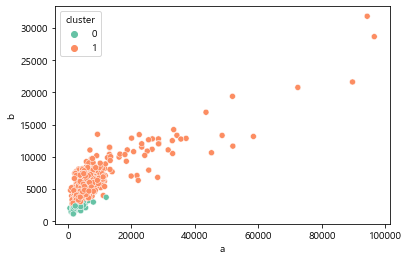

In [388]:
sns.scatterplot(x="a",y="b",hue="cluster",data=result,palette="Set2")

<취약지 분석>

1. 여의도

In [389]:
yeoui = pd.read_csv('yeouido.csv')
yeoui.head()

,시도(출발),시군구(출발),읍면동(출발),시도(도착),시군구(도착),읍면동(도착),통행량,통행시간
0,서울특별시,강남구,개포동,서울특별시,영등포구,여의도동,191,41.96
1,서울특별시,강남구,논현동,서울특별시,영등포구,여의도동,430,28.75
2,서울특별시,강남구,대치동,서울특별시,영등포구,여의도동,376,37.45
3,서울특별시,강남구,도곡동,서울특별시,영등포구,여의도동,339,35.95
4,서울특별시,강남구,삼성동,서울특별시,영등포구,여의도동,759,33.41


In [390]:
yeoui.drop(["시도(출발)","시도(도착)","시군구(도착)","읍면동(도착)"],axis=1,inplace=True)

In [391]:
yeoui.rename(columns = {"시군구(출발)": "시군구", "읍면동(출발)":"읍면동"}, inplace = True)

In [392]:
yeoui

,시군구,읍면동,통행량,통행시간
0,강남구,개포동,191,41.96
1,강남구,논현동,430,28.75
2,강남구,대치동,376,37.45
3,강남구,도곡동,339,35.95
4,강남구,삼성동,759,33.41
...,...,...,...,...
363,중랑구,면목동,242,55.28
364,중랑구,묵동,61,55.98
365,중랑구,상봉동,157,57.78
366,중랑구,신내동,174,56.10


<AxesSubplot:xlabel='시군구'>

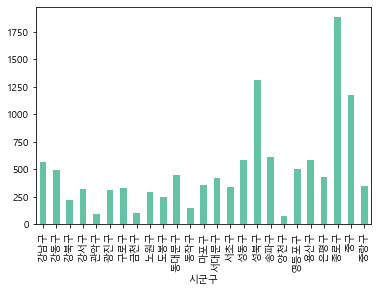

In [393]:
yeoui.groupby('시군구')['통행시간'].sum().plot.bar()

In [394]:
yeoui.describe()

,통행량,통행시간
count,368.000000,368.000000
mean,210.285326,33.176875
std,403.895180,13.528673
min,1.000000,7.650000
25%,15.000000,22.747500
50%,74.000000,33.110000
75%,204.250000,41.697500
max,3461.000000,68.860000


In [395]:
yeoui_m = yeoui['통행량']>=210
yeoui_time_m = yeoui['통행시간']>=33

In [396]:
yeoui_mean = yeoui[yeoui_m == True]
yeoui_time_mean = yeoui[yeoui_time_m == True]

In [397]:
yeoui_mean=yeoui_mean['읍면동']
yeoui_time_mean=yeoui_time_mean['읍면동']

In [398]:
yeoui_time_mean_t = pd.concat([yeoui_mean,yeoui_time_mean])
yeoui_time_mean_top = yeoui_time_mean_t.duplicated()

In [399]:
yeoui_time_mean_top2 = yeoui_time_mean_t[yeoui_time_mean_top == True]
yeoui_time_mean_top2 = yeoui_time_mean_top2.drop_duplicates()
yeoui_time_mean_top2

262     신사동
2       대치동
3       도곡동
4       삼성동
11      일원동
17      둔촌동
18      명일동
19      상일동
20      성내동
23      미아동
24       번동
34      방화동
42      구의동
45      자양동
46      중곡동
58      가산동
60      시흥동
61      공릉동
62      상계동
69       창동
70     답십리동
74      장안동
109    남가좌동
128     서초동
148     행당동
149     길음동
178     가락동
182     방이동
184     석촌동
186     신천동
188     잠실동
260     불광동
266     진관동
363     면목동
Name: 읍면동, dtype: object

In [400]:
#Clustering

<AxesSubplot:xlabel='통행시간', ylabel='통행량'>

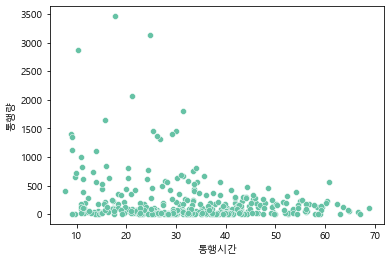

In [401]:
sns.scatterplot(x="통행시간",y="통행량",data=yeoui,palette="Set2")

In [402]:
y_c = yeoui.pivot_table(values=['통행시간','통행량'],index=['읍면동','시군구'])
#y_c

In [403]:
centroids = y_c.sample(4, random_state=1)

In [404]:
distance = sp.spatial.distance.cdist(y_c, centroids, "euclidean")

In [405]:
cluster_num = np.argmin(distance, axis=1)

In [406]:
result = y_c.copy()
result["cluster"] = np.array(cluster_num)
#result.head()

Text(0.5, 1.0, '<여의동>')

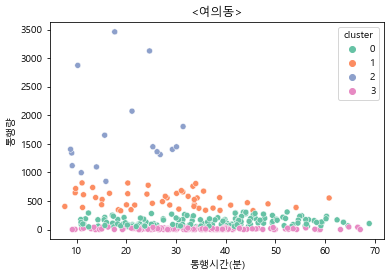

In [407]:
yeoui_c = sns.scatterplot(x="통행시간",y="통행량",hue="cluster",data=result,palette="Set2")
yeoui_c.set_xlabel('통행시간(분)')
yeoui_c.set_title('<여의동>') 

2. 역삼동

In [408]:
yeok = pd.read_csv('yeoksam.csv')
yeok.head()

,시도(출발),시군구(출발),읍면동(출발),시도(도착),시군구(도착),읍면동(도착),통행량,통행시간
0,서울특별시,강남구,개포동,서울특별시,강남구,역삼동,1114,19.68
1,서울특별시,강남구,논현동,서울특별시,강남구,역삼동,1989,12.80
2,서울특별시,강남구,대치동,서울특별시,강남구,역삼동,2178,14.41
3,서울특별시,강남구,도곡동,서울특별시,강남구,역삼동,1823,13.43
4,서울특별시,강남구,삼성동,서울특별시,강남구,역삼동,5871,11.81


In [409]:
yeok.drop(["시도(출발)","시도(도착)","시군구(도착)","읍면동(도착)"],axis=1,inplace=True)

In [410]:
yeok.rename(columns = {"시군구(출발)": "시군구", "읍면동(출발)":"읍면동"}, inplace = True)

In [411]:
yeok

,시군구,읍면동,통행량,통행시간
0,강남구,개포동,1114,19.68
1,강남구,논현동,1989,12.80
2,강남구,대치동,2178,14.41
3,강남구,도곡동,1823,13.43
4,강남구,삼성동,5871,11.81
...,...,...,...,...
367,중랑구,면목동,1219,40.93
368,중랑구,묵동,277,45.81
369,중랑구,상봉동,586,43.60
370,중랑구,신내동,304,53.45


<AxesSubplot:xlabel='시군구'>

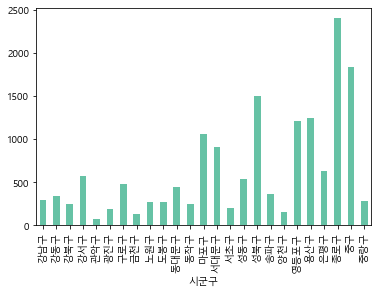

In [412]:
yeok.groupby('시군구')['통행시간'].sum().plot.bar()

In [413]:
yeok.describe()

,통행량,통행시간
count,372.000000,372.000000
mean,465.887097,42.670914
std,1227.010545,13.422461
min,1.000000,8.800000
25%,10.750000,35.087500
50%,117.000000,42.955000
75%,401.500000,50.227500
max,12328.000000,140.150000


In [414]:
yeok_m = yeok['통행량']>=465
yeok_time_m = yeok['통행시간']>=42

In [415]:
yeok_mean = yeok[yeok_m == True]
yeok_time_mean = yeok[yeok_time_m == True]

In [416]:
yeok_mean=yeok_mean['읍면동']
yeok_time_mean=yeok_time_mean['읍면동']

In [417]:
yeok_time_mean_t = pd.concat([yeok_mean,yeok_time_mean])
yeok_time_mean_top = yeok_time_mean_t.duplicated()

In [418]:
yeok_time_mean_top2 = yeok_time_mean_t[yeok_time_mean_top == True]
yeok_time_mean_top2 = yeok_time_mean_top2.drop_duplicates()
yeok_time_mean_top2

269    신사동
19     상일동
23     미아동
24      번동
33     마곡동
34     방화동
37     화곡동
49     개봉동
54     오류동
58     가산동
60     시흥동
61     공릉동
62     상계동
69      창동
94     동교동
99     서교동
120    창천동
126    홍제동
197     목동
198    신월동
199    신정동
267    불광동
369    상봉동
Name: 읍면동, dtype: object

In [419]:
#Clustering

<AxesSubplot:xlabel='통행시간', ylabel='통행량'>

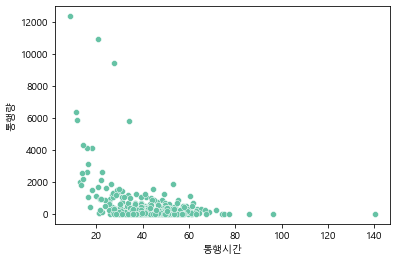

In [420]:
sns.scatterplot(x="통행시간",y="통행량",data=yeok,palette="Set2")

In [421]:
yk_c = yeok.pivot_table(values=['통행시간','통행량'],index=['읍면동','시군구'])
#yk_c

In [422]:
centroids = yk_c.sample(4, random_state=1)

In [423]:
distance = sp.spatial.distance.cdist(yk_c, centroids, "euclidean")

In [424]:
cluster_num = np.argmin(distance, axis=1)

In [425]:
result = yk_c.copy()
result["cluster"] = np.array(cluster_num)
#result.head()

Text(0.5, 1.0, '<역삼동>')

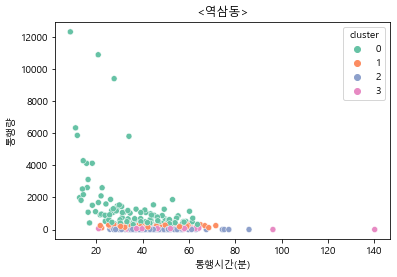

In [426]:
yeok_c = sns.scatterplot(x="통행시간",y="통행량",hue="cluster",data=result,palette="Set2")
yeok_c.set_xlabel('통행시간(분)')
yeok_c.set_title('<역삼동>') 

3. 가산동

In [427]:
ga = pd.read_csv('gasan.csv')
ga.head()

,시도(출발),시군구(출발),읍면동(출발),시도(도착),시군구(도착),읍면동(도착),통행량,통행시간,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,서울특별시,강남구,개포동,서울특별시,금천구,가산동,64,56.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시,강남구,논현동,서울특별시,금천구,가산동,484,40.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,서울특별시,강남구,대치동,서울특별시,금천구,가산동,90,51.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,서울특별시,강남구,도곡동,서울특별시,금천구,가산동,103,51.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,서울특별시,강남구,삼성동,서울특별시,금천구,가산동,577,46.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [428]:
ga = ga.drop(["시도(출발)","시도(도착)","시군구(도착)","읍면동(도착)",'Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'],axis=1)

In [429]:
ga.rename(columns = {"시군구(출발)": "시군구", "읍면동(출발)":"읍면동"}, inplace = True)

In [430]:
ga

,시군구,읍면동,통행량,통행시간
0,강남구,개포동,64,56.73
1,강남구,논현동,484,40.35
2,강남구,대치동,90,51.41
3,강남구,도곡동,103,51.03
4,강남구,삼성동,577,46.86
...,...,...,...,...
333,중랑구,신내동,92,71.90
334,중랑구,상봉동,189,62.10
335,중랑구,묵동,87,64.45
336,중랑구,면목동,337,60.31


<AxesSubplot:xlabel='시군구'>

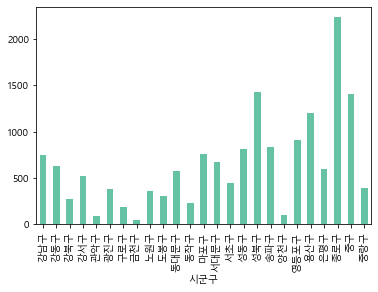

In [431]:
ga.groupby('시군구')['통행시간'].sum().plot.bar()

In [432]:
ga.describe()

,통행량,통행시간
count,338.000000,338.000000
mean,162.082840,47.810562
std,415.380401,14.634699
min,1.000000,10.580000
25%,6.250000,38.132500
50%,48.500000,49.030000
75%,137.750000,57.500000
max,4087.000000,83.260000


In [433]:
ga_m = ga['통행량']>=162
ga_time_m = ga['통행시간']>=47

In [434]:
ga_mean = ga[ga_m == True]
ga_time_mean = ga[ga_time_m == True]

In [435]:
ga_mean=ga_mean['읍면동']
ga_time_mean=ga_time_mean['읍면동']

In [436]:
ga_time_mean_t = pd.concat([ga_mean,ga_time_mean])
ga_time_mean_top = ga_time_mean_t.duplicated()

In [437]:
ga_time_mean_top2 = ga_time_mean_t[ga_time_mean_top == True]
ga_time_mean_top2

7      신사동
23     미아동
33     마곡동
34     방화동
45     자양동
46     중곡동
47     화양동
61     공릉동
62     상계동
63     월계동
69      창동
75     전농동
76     제기동
97     상암동
181    신천동
183    잠실동
254    불광동
295    창신동
334    상봉동
336    면목동
Name: 읍면동, dtype: object

In [438]:
#Clustering

<AxesSubplot:xlabel='통행시간', ylabel='통행량'>

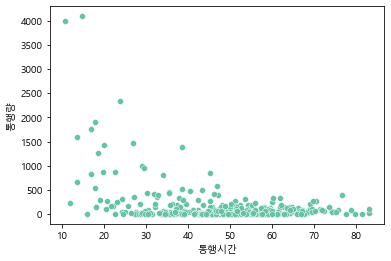

In [439]:
sns.scatterplot(x="통행시간",y="통행량",data=ga,palette="Set2")

In [440]:
g_c = ga.pivot_table(values=['통행시간','통행량'],index=['읍면동','시군구'])
#g_c

In [441]:
centroids = g_c.sample(4, random_state=1)

In [442]:
distance = sp.spatial.distance.cdist(g_c, centroids, "euclidean")

In [443]:
cluster_num = np.argmin(distance, axis=1)

In [444]:
result = g_c.copy()
result["cluster"] = np.array(cluster_num)
#result.head()

Text(0.5, 1.0, '<가산동>')

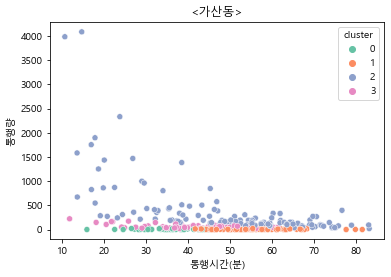

In [445]:
ga_c = sns.scatterplot(x="통행시간",y="통행량",hue="cluster",data=result,palette="Set2")
ga_c.set_xlabel('통행시간(분)')
ga_c.set_title('<가산동>') 

25~60세 인구비율

In [446]:
people = pd.read_csv('people.csv')

In [447]:
people.head()

,자치구,동,구분,계,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세
0,종로구,소계,계,158996,13721,14261,10902,10505,10525,12759,13399,13120
1,종로구,소계,한국인,149384,10474,12942,10084,9859,9949,12282,12892,12567
2,종로구,소계,외국인,9612,3247,1319,818,646,576,477,507,553
3,종로구,사직동,계,9806,506,758,762,771,731,816,828,772
4,종로구,사직동,한국인,9526,496,741,721,720,686,792,809,751


In [448]:
peo = people['구분'] == "계"

In [449]:
peo2 = people['동'] != "소계"

In [450]:
people = people[peo & peo2]

In [451]:
people.drop("계",axis=1,inplace=True)

In [452]:
people.drop("구분",axis=1,inplace=True)

In [453]:
people.head()

,자치구,동,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세
3,종로구,사직동,506,758,762,771,731,816,828,772
6,종로구,삼청동,144,180,186,226,231,201,207,241
9,종로구,부암동,681,773,690,682,747,909,910,835
12,종로구,평창동,1167,1303,1047,1238,1267,1537,1648,1657
15,종로구,무악동,490,452,405,549,665,854,761,667


In [454]:
people.dtypes

자치구       object
동         object
20~24세    object
25~29세    object
30~34세    object
35~39세    object
40~44세    object
45~49세     int64
50~54세     int64
55~59세    object
dtype: object

In [455]:
people['20~24세'] = people['20~24세'].astype('int')
people['25~29세'] = people['25~29세'].astype('int')
people['30~34세'] = people['30~34세'].astype('int')
people['35~39세'] = people['35~39세'].astype('int')
people['40~44세'] = people['40~44세'].astype('int')
people['55~59세'] = people['55~59세'].astype('int')

In [456]:
people.dtypes

자치구       object
동         object
20~24세     int32
25~29세     int32
30~34세     int32
35~39세     int32
40~44세     int32
45~49세     int64
50~54세     int64
55~59세     int32
dtype: object

In [457]:
people['총계'] = people.sum(axis=1)
people

,자치구,동,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,총계
3,종로구,사직동,506,758,762,771,731,816,828,772,5944
6,종로구,삼청동,144,180,186,226,231,201,207,241,1616
9,종로구,부암동,681,773,690,682,747,909,910,835,6227
12,종로구,평창동,1167,1303,1047,1238,1267,1537,1648,1657,10864
15,종로구,무악동,490,452,405,549,665,854,761,667,4843
...,...,...,...,...,...,...,...,...,...,...,...
1335,강동구,둔촌1동,11,11,4,18,30,22,19,10,125
1338,강동구,둔촌2동,1670,2084,1884,1998,1911,2008,2202,2212,15969
1341,강동구,암사1동,2161,2734,2557,2801,2775,2887,3032,3039,21986
1344,강동구,천호2동,1828,3211,3327,3121,2513,2632,2810,3154,22596


<AxesSubplot:xlabel='자치구'>

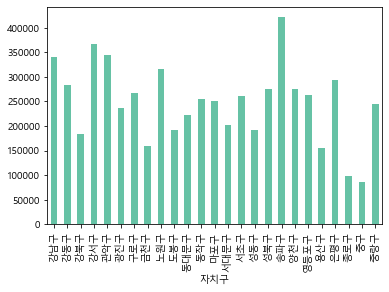

In [458]:
people.groupby('자치구')['총계'].sum().plot.bar()

In [459]:
people['총계'].sort_values(ascending = False)

822     35729
600     33391
975     30619
885     29825
1347    29531
        ...  
63       2280
57       2043
6        1616
75       1136
1335      125
Name: 총계, Length: 425, dtype: int64

In [460]:
people['총계'].describe()

count      425.000000
mean     14556.943529
std       5694.760065
min        125.000000
25%      10837.000000
50%      14124.000000
75%      17934.000000
max      35729.000000
Name: 총계, dtype: float64

In [461]:
people_m = people['총계']>=14556

In [462]:
people_mean_t = people[people_m == True]
people_mean_f = people[people_m == False]

In [463]:
people_mean_high = people_mean_t
people_mean_low = people_mean_f
people_mean_high
#people_mean_low

,자치구,동,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,총계
123,용산구,이촌1동,1548,1479,1599,2209,2450,2691,2634,2061,16671
147,용산구,한강로동,1223,2018,2306,2086,1680,1579,1865,1847,14604
150,용산구,한남동,1116,1964,2268,2438,2022,1921,1906,1786,15421
159,성동구,마장동,2151,2520,1820,1573,1373,1727,1902,1908,14974
168,성동구,행당2동,1503,1545,1789,1943,1924,2179,2120,1819,14822
...,...,...,...,...,...,...,...,...,...,...,...
1332,강동구,성내3동,1589,2110,1816,1835,1763,1885,2037,1983,15018
1338,강동구,둔촌2동,1670,2084,1884,1998,1911,2008,2202,2212,15969
1341,강동구,암사1동,2161,2734,2557,2801,2775,2887,3032,3039,21986
1344,강동구,천호2동,1828,3211,3327,3121,2513,2632,2810,3154,22596


소득수준

In [464]:
income = pd.read_csv('income.csv')

In [465]:
income.head()

,구분,급여총계(인원),급여총계(금액)
0,서울,3845841,164800618
1,강남구,209653,14926829
2,강동구,183833,7447177
3,강북구,105025,3075447
4,강서구,245495,9178851


In [466]:
income = income.drop(index = 0, axis = 0)

In [467]:
income.rename(columns = {"구분": "자치구"}, inplace = True)

In [468]:
income

,자치구,급여총계(인원),급여총계(금액)
1,강남구,209653,14926829
2,강동구,183833,7447177
3,강북구,105025,3075447
4,강서구,245495,9178851
5,관악구,217483,6865539
6,광진구,145629,5495292
7,구로구,171843,5972692
8,금천구,98934,2973640
9,노원구,191248,7206570
10,도봉구,118771,3797517


In [469]:
income.dtypes

자치구         object
급여총계(인원)     int64
급여총계(금액)     int64
dtype: object

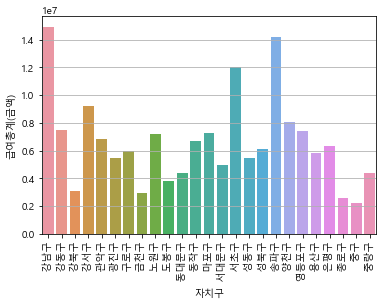

In [470]:
plt.grid()
sns.barplot(x='자치구',y='급여총계(금액)',data=income)
plt.xticks(rotation = 90)
plt.show()

In [471]:
pd.options.display.float_format = '{:.5f}'.format  #지수표현식에서 실수표현으로

In [472]:
income.describe()

,급여총계(인원),급여총계(금액)
count,25.00000,25.00000
mean,153833.64000,6592024.76000
std,54608.86461,3247102.53232
min,47280.00000,2184474.00000
25%,118771.00000,4416068.00000
50%,156129.00000,6132023.00000
75%,183833.00000,7398345.00000
max,280758.00000,14926829.00000


In [473]:
income_m = income['급여총계(금액)']>=6592024

In [474]:
income_mean_t = income[income_m == True]
income_mean_f = income[income_m == False]

In [475]:
income_mean_high = income_mean_t['자치구']
income_mean_low = income_mean_f['자치구']
#income_mean_high
income_mean_low

3       강북구
6       광진구
7       구로구
8       금천구
10      도봉구
11     동대문구
14     서대문구
16      성동구
17      성북구
21      용산구
22      은평구
23      종로구
24       중구
25      중랑구
Name: 자치구, dtype: object

In [476]:
inc = income.pivot_table(values=['급여총계(인원)','급여총계(금액)'],index=['자치구'])
#g_c

In [477]:
centroids = inc.sample(2, random_state=1)

In [478]:
distance = sp.spatial.distance.cdist(inc, centroids, "euclidean")

In [479]:
cluster_num = np.argmin(distance, axis=1)

In [480]:
result = inc.copy()
result["cluster"] = np.array(cluster_num)
#result.head()

Text(0.5, 1.0, '소득수준')

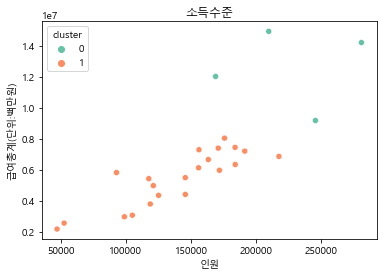

In [481]:
inco = sns.scatterplot(x="급여총계(인원)",y="급여총계(금액)",hue="cluster",data=result,palette="Set2")
inco.set_xlabel('인원')
inco.set_ylabel('급여총계(단위:백만원)')
inco.set_title('소득수준')

소득수준 하 & 핵심생산인구 상

In [482]:
pmt = people_mean_t["자치구"]
pmt = pmt.drop_duplicates()
#pmt.head(10)

In [484]:
pmt_iml = pd.concat([pmt,income_mean_low])

In [485]:
pmt_iml2 = list(np.array(pmt_iml.tolist()))

In [486]:
pi_list = [ i.replace(' ','') for i in pmt_iml2 ]


In [487]:
pi_df=pd.DataFrame(pi_list)

In [488]:
pi_df2 = pi_df.duplicated()


In [489]:
peole_high_income_low = pi_df[pi_df2 == True]
peole_high_income_low = peole_high_income_low[0]
peole_high_income_low

23     강북구
24     광진구
25     구로구
26     금천구
27     도봉구
28    동대문구
29    서대문구
30     성동구
31     성북구
32     용산구
33     은평구
36     중랑구
Name: 0, dtype: object

In [490]:
contain_gu=people_mean_high['자치구'].str.contains("강북구|광진구|구로구|금천구|도봉구|동대문구|서대문구|성동구|성북구|용산구|은평구|중랑구")
contain_gu

123      True
147      True
150      True
159      True
168      True
        ...  
1332    False
1338    False
1341    False
1344    False
1347    False
Name: 자치구, Length: 200, dtype: bool

In [491]:
dong=people_mean_high[contain_gu]["동"]
dong

123    이촌1동
147    한강로동
150     한남동
159     마장동
168    행당2동
       ... 
873    오류2동
882     가산동
885    독산1동
891    독산3동
897    시흥1동
Name: 동, Length: 86, dtype: object

In [492]:
qaz=np.array(yeoui_time_mean_top2.tolist())

In [496]:
y = [line.rstrip("동") for line in qaz]
#y

In [497]:
aaaaa = dong.apply(lambda x: any(i in x for i in y))

In [498]:
oo1 = dong[aaaaa == True]
oo1

168      행당2동
219      중곡2동
225      중곡4동
231      구의1동
234      구의2동
237      구의3동
243      자양1동
246      자양2동
249      자양3동
282     답십리2동
285      장안1동
288      장안2동
297     답십리1동
303      면목2동
342      면목본동
345    면목3.8동
378      길음1동
480       창1동
483       창2동
489       창4동
492       창5동
564       녹번동
567      불광1동
588      신사1동
600       진관동
603      불광2동
636     남가좌2동
882       가산동
897      시흥1동
Name: 동, dtype: object

In [499]:
qaz=np.array(yeok_time_mean_top2.tolist())

In [500]:
y = [line.rstrip("동") for line in qaz]
#y

In [501]:
aaaaa = dong.apply(lambda x: any(i in x for i in y))

In [502]:
oo2 = dong[aaaaa == True]
oo2

303      면목2동
315      상봉1동
342      면목본동
345    면목3.8동
480       창1동
483       창2동
489       창4동
492       창5동
564       녹번동
567      불광1동
588      신사1동
603      불광2동
618      홍제1동
852      개봉2동
858      오류1동
870      개봉1동
873      오류2동
882       가산동
897      시흥1동
Name: 동, dtype: object

In [503]:
qaz=np.array(ga_time_mean_top2.tolist())

In [504]:
y = [line.rstrip("동") for line in qaz]
#y

In [505]:
aaaaa = dong.apply(lambda x: any(i in x for i in y))

In [506]:
oo3 = dong[aaaaa == True]
oo3

210       화양동
219      중곡2동
225      중곡4동
243      자양1동
246      자양2동
249      자양3동
273       제기동
276      전농1동
303      면목2동
315      상봉1동
342      면목본동
345    면목3.8동
480       창1동
483       창2동
489       창4동
492       창5동
567      불광1동
588      신사1동
603      불광2동
Name: 동, dtype: object

In [507]:
location_a = pd.concat([oo1,oo2,oo3])

In [508]:
location_a1 = location_a.duplicated()

In [509]:
location_a2 = location_a[location_a1 == True]
location_a2.drop_duplicates()

303      면목2동
342      면목본동
345    면목3.8동
480       창1동
483       창2동
489       창4동
492       창5동
564       녹번동
567      불광1동
588      신사1동
603      불광2동
882       가산동
897      시흥1동
219      중곡2동
225      중곡4동
243      자양1동
246      자양2동
249      자양3동
315      상봉1동
Name: 동, dtype: object

소득수준 상 & 핵심생산인구 상

In [510]:
pmt = people_mean_t["자치구"]
pmt = pmt.drop_duplicates()
pmt

123      용산구
159      성동구
210      광진구
264     동대문구
303      중랑구
357      성북구
432      강북구
471      도봉구
507      노원구
564      은평구
618     서대문구
669      마포구
711      양천구
768      강서구
831      구로구
882      금천구
915     영등포구
975      동작구
1020     관악구
1092     서초구
1146     강남구
1215     송파구
1296     강동구
Name: 자치구, dtype: object

In [511]:
pmt_iml = pd.concat([pmt,income_mean_high])

In [512]:
pmt_iml2 = list(np.array(pmt_iml.tolist()))

In [513]:
pi_list = [ i.replace(' ','') for i in pmt_iml2 ]

In [514]:
pi_df=pd.DataFrame(pi_list)

In [515]:
pi_df2 = pi_df.duplicated()

In [516]:
peole_high_income_high = pi_df[pi_df2 == True]
peole_high_income_high = peole_high_income_high[0]
peole_high_income_high

23     강남구
24     강동구
25     강서구
26     관악구
27     노원구
28     동작구
29     마포구
30     서초구
31     송파구
32     양천구
33    영등포구
Name: 0, dtype: object

In [517]:
contain_gu1=people_mean_high['자치구'].str.contains("강남구|강동구|강서구|관악구|노원구|동작구|마포구|서초구|송파구|양천구|영등포구")

In [518]:
dong=people_mean_high[contain_gu1]["동"]
dong

507     월계2동
510     월계3동
513     공릉2동
516     하계1동
522     중계본동
        ... 
1332    성내3동
1338    둔촌2동
1341    암사1동
1344    천호2동
1347      길동
Name: 동, Length: 114, dtype: object

In [519]:
qaz=np.array(yeoui_time_mean_top2.tolist())

In [520]:
y = [line.rstrip("동") for line in qaz]

In [521]:
aaaaa = dong.apply(lambda x: any(i in x for i in y))

In [522]:
oo1 = dong[aaaaa == True]
oo1

513       공릉2동
531       상계1동
549     상계3.4동
552     상계6.7동
558       공릉1동
768        염창동
813       방화1동
1050       신사동
1092      서초3동
1095      서초4동
1155      삼성2동
1173      도곡2동
1203      대치2동
1233      방이2동
1248       석촌동
1254      가락본동
1257      가락1동
1260      가락2동
1269      잠실본동
1281      잠실2동
1284      잠실3동
1299       상일동
1302      명일1동
1329      성내2동
1332      성내3동
1338      둔촌2동
Name: 동, dtype: object

In [523]:
qaz=np.array(yeok_time_mean_top2.tolist())

In [524]:
y = [line.rstrip("동") for line in qaz]

In [525]:
aaaaa = dong.apply(lambda x: any(i in x for i in y))

In [526]:
oo2 = dong[aaaaa == True]
oo2

513       공릉2동
531       상계1동
549     상계3.4동
552     상계6.7동
558       공릉1동
672        서교동
711        목1동
714        목2동
717        목3동
720        목4동
750       신정3동
753       신정6동
756       신정7동
759        목5동
762       신정4동
768        염창동
780       화곡본동
792       화곡6동
795       화곡8동
813       방화1동
822       화곡1동
1050       신사동
1299       상일동
Name: 동, dtype: object

In [527]:
qaz=np.array(ga_time_mean_top2.tolist())

In [528]:
y = [line.rstrip("동") for line in qaz]

In [529]:
aaaaa = dong.apply(lambda x: any(i in x for i in y))

In [530]:
oo3 = dong[aaaaa == True]
oo3

507       월계2동
510       월계3동
513       공릉2동
531       상계1동
549     상계3.4동
552     상계6.7동
558       공릉1동
693        상암동
768        염창동
813       방화1동
1050       신사동
1269      잠실본동
1281      잠실2동
1284      잠실3동
Name: 동, dtype: object

In [531]:
location_b = pd.concat([oo1,oo2,oo3])

In [532]:
location_b1 = location_b.duplicated()

In [533]:
location_b2 = location_b[location_b1 == True]
location_b2.drop_duplicates()

513       공릉2동
531       상계1동
549     상계3.4동
552     상계6.7동
558       공릉1동
768        염창동
813       방화1동
1050       신사동
1299       상일동
1269      잠실본동
1281      잠실2동
1284      잠실3동
Name: 동, dtype: object

소득수준 하 & 핵심생산인구 하

In [534]:
pmt = people_mean_f["자치구"]
pmt = pmt.drop_duplicates()
#pmt.head(10)

In [535]:
pmt_iml = pd.concat([pmt,income_mean_low])

In [536]:
pmt_iml2 = list(np.array(pmt_iml.tolist()))

In [537]:
pi_list = [ i.replace(' ','') for i in pmt_iml2 ]

In [538]:
pi_df=pd.DataFrame(pi_list)

In [540]:
pi_df2 = pi_df.duplicated()

In [541]:
peole_low_income_low = pi_df[pi_df2 == True]
peole_low_income_low = peole_low_income_low[0]
peole_low_income_low

25     강북구
26     광진구
27     구로구
28     금천구
29     도봉구
30    동대문구
31    서대문구
32     성동구
33     성북구
34     용산구
35     은평구
36     종로구
37      중구
38     중랑구
Name: 0, dtype: object

In [542]:
contain_gu2=people_mean_low['자치구'].str.contains("강북구|광진구|구로구|금천구|도봉구|동대문구|서대문구|성동구|성북구|용산구|은평구|종로구|중구|중랑구")

In [543]:
dong=people_mean_low[contain_gu2]["동"]
dong

3       사직동
6       삼청동
9       부암동
12      평창동
15      무악동
       ... 
894    독산4동
900    시흥2동
903    시흥3동
906    시흥4동
909    시흥5동
Name: 동, Length: 127, dtype: object

In [544]:
qaz=np.array(yeoui_time_mean_top2.tolist())

In [545]:
y = [line.rstrip("동") for line in qaz]

In [546]:
aaaaa = dong.apply(lambda x: any(i in x for i in y))

In [547]:
oo1 = dong[aaaaa == True]
oo1

12       평창동
33      창신1동
36      창신2동
39      창신3동
117      효창동
165     행당1동
216     중곡1동
222     중곡3동
252     자양4동
306     면목4동
309     면목5동
312     면목7동
381     길음2동
417      번1동
420      번2동
423      번3동
438      미아동
486      창3동
591     신사2동
633    남가좌1동
900     시흥2동
903     시흥3동
906     시흥4동
909     시흥5동
Name: 동, dtype: object

In [548]:
qaz=np.array(yeok_time_mean_top2.tolist())

In [549]:
y = [line.rstrip("동") for line in qaz]

In [550]:
aaaaa = dong.apply(lambda x: any(i in x for i in y))

In [551]:
oo2 = dong[aaaaa == True]
oo2

12      평창동
33     창신1동
36     창신2동
39     창신3동
117     효창동
306    면목4동
309    면목5동
312    면목7동
318    상봉2동
417     번1동
420     번2동
423     번3동
438     미아동
486     창3동
591    신사2동
621    홍제3동
624    홍제2동
855    개봉3동
900    시흥2동
903    시흥3동
906    시흥4동
909    시흥5동
Name: 동, dtype: object

In [552]:
qaz=np.array(ga_time_mean_top2.tolist())

In [553]:
y = [line.rstrip("동") for line in qaz]

In [554]:
aaaaa = dong.apply(lambda x: any(i in x for i in y))

In [555]:
oo3 = dong[aaaaa == True]
oo3

12      평창동
33     창신1동
36     창신2동
39     창신3동
117     효창동
216    중곡1동
222    중곡3동
252    자양4동
279    전농2동
306    면목4동
309    면목5동
312    면목7동
318    상봉2동
438     미아동
486     창3동
591    신사2동
Name: 동, dtype: object

In [556]:
location_c = pd.concat([oo1,oo2,oo3])

In [557]:
location_c1 = location_c.duplicated()

In [560]:
location_c2 = location_c[location_c1 == True]
location_c2.drop_duplicates()

12      평창동
33     창신1동
36     창신2동
39     창신3동
117     효창동
306    면목4동
309    면목5동
312    면목7동
417     번1동
420     번2동
423     번3동
438     미아동
486     창3동
591    신사2동
900    시흥2동
903    시흥3동
906    시흥4동
909    시흥5동
216    중곡1동
222    중곡3동
252    자양4동
318    상봉2동
Name: 동, dtype: object